## Clustering Analysis

This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

## Importing libraries and data and renaming columns

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans #importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
#ensuring the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
#creating path to import the files
path = r'C:\Users\rbrand\Exploring Relationships'

In [4]:
#Importing the cleaned dataframe and double checking the shape
re_clean_data = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 're_clean_data.csv'))

In [5]:
re_clean_data.shape

(414, 10)

In [6]:
re_clean_data.head()

,Unnamed: 0,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit,Price Category
0,0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,Medium-Low
1,1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,Medium-High
2,2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,High
3,3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,High
4,4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,Medium-High


In [7]:
# Dropping the 'Unnamed: 0' and 'No' columns
re_clean_data = re_clean_data.drop(columns=['Unnamed: 0', 'No'])

# Displaying the first few rows of the cleaned DataFrame
print(re_clean_data.head())

       Date  House age   D. metro  N. shops  Latitude  Longitude  \
0  2012.917       32.0   84.87882        10  24.98298  121.54024   
1  2012.917       19.5  306.59470         9  24.98034  121.53951   
2  2013.583       13.3  561.98450         5  24.98746  121.54391   
3  2013.500       13.3  561.98450         5  24.98746  121.54391   
4  2012.833        5.0  390.56840         5  24.97937  121.54245   

   Price per unit Price Category  
0            37.9     Medium-Low  
1            42.2    Medium-High  
2            47.3           High  
3            54.8           High  
4            43.1    Medium-High  


In [9]:
re_clean_data.shape

(414, 8)

In [11]:
#Renaming the columns
re_clean_data.rename(columns = {'X1 transaction date' : 'Date', 'X2 house age': 'House age', 'X3 distance to the nearest MRT station': 'D. metro', 'X4 number of convenience stores': 'N. shops', 'Y house price of unit area': 'Price per unit', 'X5 latitude' : 'Latitude', 'X6 longitude' : 'Longitude' }, inplace = True)

## 2. The elbow technique

In [12]:
# Defining the range of potential clusters in the data.
num_cl = range(1, 10)
# Defining k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [22]:
# Dropping the 'Price Category' columns for the assigment
re_clean_data = re_clean_data.drop(columns=['Price Category'])
re_clean_data.head()

,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [24]:
# Creating the score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(re_clean_data).score(re_clean_data) for i in range(len(kmeans))] # Creates a score that represents 
score

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

[-658009900.9639183,
 -181142890.17249116,
 -55118852.99439008,
 -37039516.50507258,
 -21908609.245918162,
 -14935463.761956714,
 -11141748.735225981,
 -8259456.447636904,
 -6711822.293067317]

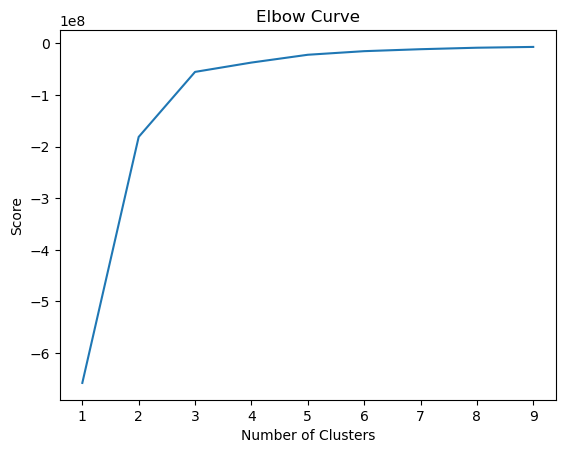

In [37]:
# Plotting the Elbow Curve
plt.plot(num_cl, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'elbow_curve.png'))

# Showing the plot
plt.show()

In this particular scenario, we notice a significant leap from two to three on the x-axis. However, beyond this point, the curve appears to stabilize. This observation suggests that the ideal number of clusters for our analysis is three.

## 3. K.MEANS CLUSTERING

In [27]:
# Creating the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [28]:
# Fitting the k-means object to the data.
kmeans.fit(re_clean_data)

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [30]:
re_clean_data['clusters'] = kmeans.fit_predict(re_clean_data)

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
re_clean_data.head()

,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit,clusters
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,0
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,0
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,0
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,0
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,0


In [32]:
re_clean_data['clusters'].value_counts()

clusters
0    280
2     93
1     41
Name: count, dtype: int64

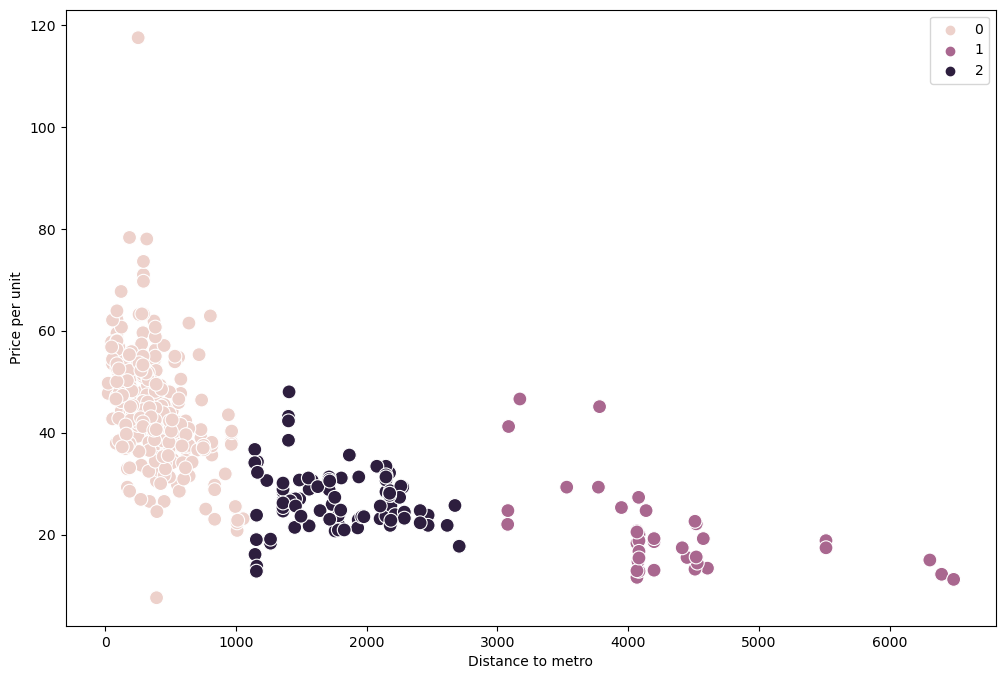

In [38]:
# Plotting the clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=re_clean_data['D. metro'], y=re_clean_data['Price per unit'], hue=kmeans.labels_, s=100)
ax.grid(False)  # Removing the grid from the background
plt.xlabel('Distance to metro')  # Labeling x-axis
plt.ylabel('Price per unit')  # Labeling y-axis

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cluster_scatterplot.png'))

# Showing the plot
plt.show()

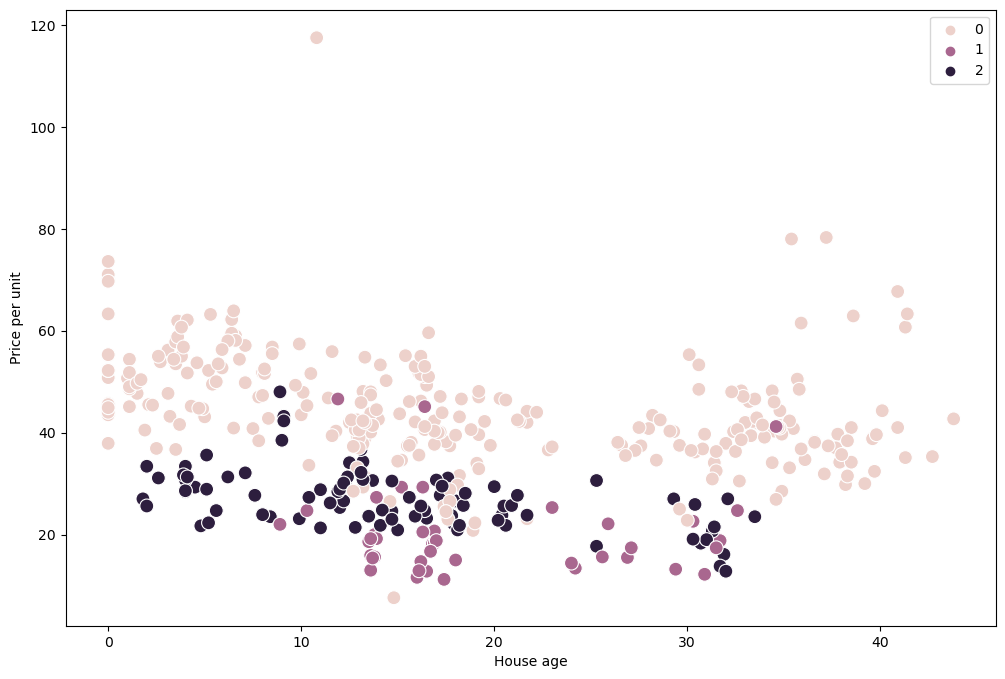

In [39]:
# Plotting the clusters
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=re_clean_data['House age'], y=re_clean_data['Price per unit'], hue=kmeans.labels_, s=100)
ax.grid(False)  # Removing the grid from the background
plt.xlabel('House age')  # Labeling x-axis
plt.ylabel('Price per unit')  # Labeling y-axis

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'cluster_house_age_vs_price.png'))

# Showing the plot
plt.show()

In [42]:
re_clean_data.loc[re_clean_data['clusters'] == 2, 'cluster'] = 'dark purple'
re_clean_data.loc[re_clean_data['clusters'] == 1, 'cluster'] = 'purple'
re_clean_data.loc[re_clean_data['clusters'] == 0, 'cluster'] = 'pink'

In [43]:
re_clean_data.groupby('cluster').agg({'N. shops':['mean', 'median'], 
                         'House age':['mean', 'median'], 
                         'D. metro':['mean', 'median'],
                          'Price per unit':['mean', 'median']})

N. shops         House age            D. metro             \
                 mean median       mean median         mean     median   
cluster                                                                  
dark purple  2.096774    2.0  15.229032   14.2  1767.950398  1735.5950   
pink         5.325000    5.0  18.270714   16.2   386.302676   373.6163   
purple       0.219512    0.0  19.534146   16.7  4296.208268  4082.0150   

            Price per unit         
                      mean median  
cluster                            
dark purple      26.706452   26.5  
pink             44.334643   42.5  
purple           20.156098   18.3

We started by bringing in the tools we need, like pandas for handling data and seaborn for making plots.Then, we load our dataset to work with it:

- Finding the optimal number of clusters: We use something called the "elbow technique" to decide how many groups we should divide our data into.This technique helps us find a balance between having too few or too many clusters.
- Performing k-means clustering: With the optimal number of clusters in mind, we run the k-means algorithm. This algorithm helps us group similar data points together based on certain characteristics.
- Analyzing the clusters: After clustering, we look at what each group represents. For example, we might compare the average values of different features for each cluster to understand their differences.